In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import joblib

In [116]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
log_reg = joblib.load('drive/My Drive/1er_Parcial_IA/Modelo_regresion_logistica.pkl')
df = pd.read_csv('drive/My Drive/1er_Parcial_IA/Datos_Etiquetados.csv', encoding='latin-1')

In [118]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

In [119]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state=42)
predicciones = log_reg.predict(X_Test)

Porcentaje de Precision de Clasificacion correctas

In [120]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,predicciones))

0.906832298136646


Precision nula, Clase mas frecuente

In [121]:
y_test.value_counts()

0    103
1     58
Name: Abandono, dtype: int64

Porcentaje de unos

In [122]:
y_test.mean()

0.36024844720496896

Porcentaje de Ceros

In [123]:
1 - y_test.mean()

0.639751552795031

In [124]:
y_test.value_counts().head(1) /len(y_test)

0    0.639752
Name: Abandono, dtype: float64

In [125]:
print('True:', y_test.values[50:100])
print('Pred:', predicciones[50:100])

True: [0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 0]
Pred: [0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 1 0]


MAtriz de confusion

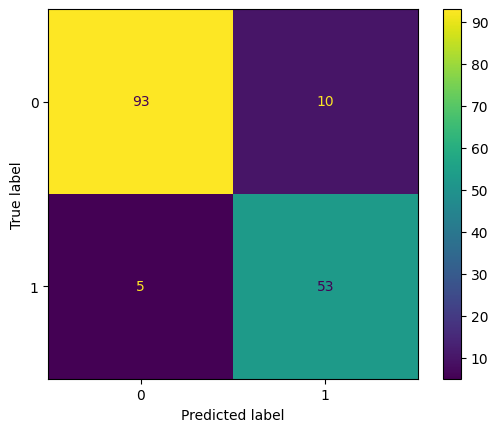

In [126]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicciones)
metrics.ConfusionMatrixDisplay(cm).plot()

In [127]:
confusion = metrics.confusion_matrix(y_test, predicciones)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Accuracy

In [128]:
print(metrics.accuracy_score(y_test,predicciones))

0.906832298136646


Error de Clasificacion

In [129]:
print(1 - metrics.accuracy_score(y_test, predicciones))

0.09316770186335399


Sensibilidad

In [130]:
print(metrics.recall_score(y_test, predicciones))

0.9137931034482759


Especifisidad

In [131]:
print(TN / float(TN + FP))

0.9029126213592233


Taza de falsos positivos

In [132]:
print(FP / float(TN + FP))

0.0970873786407767


Precision

In [133]:
print(metrics.precision_score(y_test, predicciones))

0.8412698412698413


In [134]:
log_reg.predict(X_Test)[0:10],log_reg.predict_proba(X_Test)[0:10, :]

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1]),
 array([[0.98396849, 0.01603151],
        [0.99220689, 0.00779311],
        [0.89359086, 0.10640914],
        [0.10643658, 0.89356342],
        [0.95800607, 0.04199393],
        [0.9947757 , 0.0052243 ],
        [0.99773459, 0.00226541],
        [0.99814778, 0.00185222],
        [0.99866239, 0.00133761],
        [0.01715789, 0.98284211]]))

Probabilidades de que sea 1 (es decir abandone)

In [135]:
y_pred_prob = log_reg.predict_proba(X_Test)[:, 1]

Text(0, 0.5, 'Frequency')

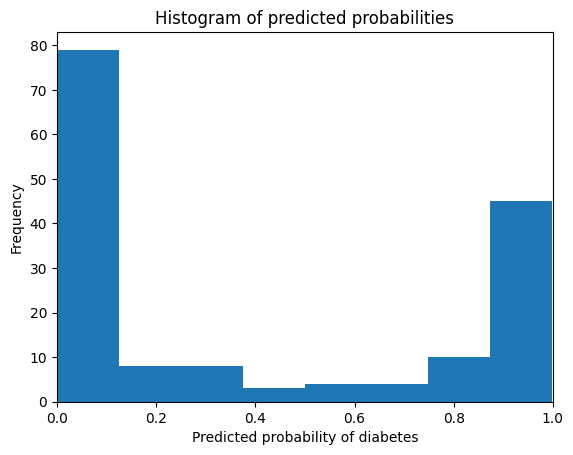

In [136]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Bajamos el umbral de presicion
Bajando el porcentaje de binarizacion a 10% se toman como un abandono si la probabilidad supera ese porcentaje, con ellos conseguimos disminuir los falsos negativos y aumentar los falsos positivos ya que la variable positiva es Abandono = 1.

In [137]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob],threshold=0.12).T

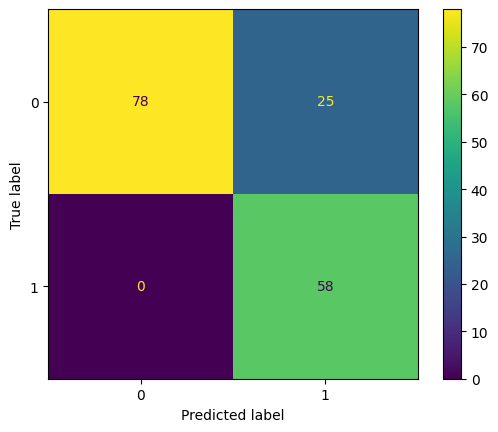

In [138]:
cm_optimiz = metrics.confusion_matrix(y_test, y_pred_class)
metrics.ConfusionMatrixDisplay(cm_optimiz).plot()

Aumento la Sensibilidad debido a la disminucion de los falsos negativos

In [139]:
print(metrics.recall_score(y_test, y_pred_class))

1.0


Disminuyo la especificidad debido al incremento de los falsos positivos

In [140]:
print(75 / float(75 + 28))

0.7281553398058253


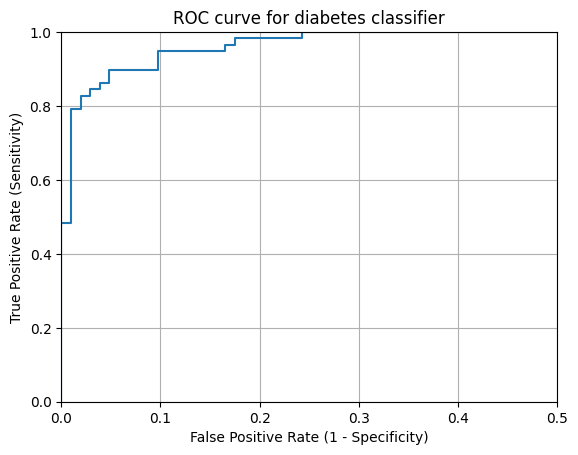

In [141]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 0.5])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [142]:
df

,Semestre,Convocatoria,Ciclo,Firma,1P,T,Asistencia,Requisito,Civil,Electronica,Industrial,Mecanica,Anho2021,Anho2022,Recursando,CantMaterias,Abandono
0,4,0,0,0,0,2,1,1,0,0,0,1,1,0,0,6,1
1,4,1,1,0,0,0,1,0,0,0,0,1,1,0,1,4,1
2,4,0,0,0,0,0,1,0,0,0,0,1,0,1,1,3,1
3,4,1,1,0,0,0,0,0,0,0,0,1,0,1,1,5,1
4,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,4,0,0,0,13,4,1,1,1,0,0,0,0,1,0,5,0
1602,4,1,1,0,16,9,1,1,1,0,0,0,0,1,1,5,0
1603,4,0,0,0,8,6,1,1,1,0,0,0,1,0,0,4,0
1604,4,1,1,0,0,0,1,0,0,0,0,1,1,0,0,7,1


In [143]:
A = [7,2,2,1,'1P','T',1,1,1,0,0,0,0,0,1,'cantM']